# Verificar as regiões de maior modificação nas regiões das proteínas NS1, NS3 e NS5 de Zika vírus.

# Prepare IDE

In [1]:
#!pip install tqdm
#!pip install biopython
#!pip install pandas
#!pip install seaborn
#!pip install rpy2
#!pip install numpy 

# Imports

In [1]:
import pandas as pd

# Custom libraries 

In [2]:
import WorkFunctions as wFunc
import WorkFlow as wFlow
import Graphs as gr

# Read files

In [3]:
protein = "read/Protein - C_NS5"
fastaProSequences = wFunc.fileRead(protein, ".fa")

# Make DataFrames
 - Fasta DataFrames

In [4]:
%%time
columns=["ID", "Host", "Region", "Date", "FullSeq"]
#Make DataFrames
fastaProDF = wFunc.makeDF(columns, fastaProSequences)

Wall time: 1.85 s


In [5]:
fastaProDF.head()

,ID,Host,Region,Date,FullSeq
0,AQU12485,Homo sapiens,Brazil,2016-01-08,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
1,AMS00611,Homo sapiens,Italy,2016-03-06,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
2,ASL68973,Homo sapiens,Nicaragua,2016-08-05,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
3,AMZ03557,Homo sapiens,Colombia,2015-12-01,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
4,ASU55415,Homo sapiens,Colombia,2015-12-01,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...


# Read PDBs

In [36]:
%%time
#dataList = ['5GS6', '5IY3', '5K6K', '5JMT', "5TMH"]
saveList, delList = wFunc.choseOne(-1)
nsFiles = wFunc.readPDBs()
cover, aminoDegrees, cleanedDF, strangeDF, poliListAmino, poliListDegree = wFunc.readOrCreate(nsFiles, fastaProDF, delList, saveList)

Ok, just reading!
Reading PDB: 5GS6
Reading PDB: 5IY3
Reading PDB: 5K6K
Reading PDB: 5JMT
Reading PDB: 5TMH
Reading PDB: 5GS6
Reading PDB: 5IY3
Reading PDB: 5K6K
Reading PDB: 5JMT
Reading PDB: 5TMH
Wall time: 1.49 s


In [37]:
cover.head()

,Protein,Sample_ID,Seq,Cover
0,5JMT,AQU12485,PVECFEPSMLKKKQLTVLDLHPGAGKTRRVLPEIVREAIKTRLRTV...,90.519187
1,5TMH,AQU12485,TLGEKWKARLNQMSALEFYSYKKSGITEVCREEARRALKDGVATGG...,86.990950
2,5GS6,AQU12485,VGCSVDFSKKETRCGTGVFVYNDVEAWRDRYKYHPDSPRRLAAAVK...,91.168091
3,5IY3,AQU12485,LKVREDYSLECDPAVIGTAVKGKEAVHSDLGYWIESEKNDTWRLKR...,88.043478
4,5K6K,AQU12485,DVGCSVDFSKKETRCGTGVFVYNDVEAWRDRYKYHPDSPRRLAAAV...,90.909091


In [38]:
aminoDegrees.head()

,ID,Protein,Seq,Len,SeqIds
0,AQU12485,5JMT,"P,1|V,5|E,2|C,-2|F,4|E,1|P,1|S,1|M,4|L,7|K,3|K...",1825,"A:175:_:PRO,A:176:_:VAL,A:177:_:GLU,-,A:179:_:..."
1,AQU12485,5TMH,"T,3|L,6|G,3|E,2|K,5|W,12|K,4|A,4|R,3|L,6|N,3|Q...",3640,"A:7:_:THR,A:8:_:LEU,A:9:_:GLY,A:10:_:GLU,A:11:..."
2,AQU12485,5GS6,"V,2|G,2|C,3|S,2|V,2|D,4|F,4|S,-2|K,3|K,2|E,2|T...",1442,"A:2:_:VAL,A:3:_:GLY,A:4:_:CYS,A:5:_:SER,A:6:_:..."
3,AQU12485,5IY3,"L,5|K,-2|V,2|R,4|E,2|D,1|Y,1|S,4|L,2|E,2|C,5|D...",757,"A:345:_:LEU,-,A:346:_:VAL,A:347:_:ARG,A:348:_:..."
4,AQU12485,5K6K,"D,3|V,4|G,1|C,3|S,2|V,2|D,7|F,2|S,1|K,3|K,4|E,...",1439,"B:1:_:ASP,B:2:_:VAL,B:3:_:GLY,B:4:_:CYS,B:5:_:..."


In [39]:
#pList = strangeDF.Protein.unique().tolist()
#wFunc.fixStrangeDF(pList, cover, aminoDegrees, strangeDF, fastaProDF, nsFiles)

In [40]:
## Erros ecncontrados
print(len(strangeDF))
strangeDF

1


,ID,Protein,Seq,Len,SeqIds
1501,ARB07968,5TMH,"T,3|L,6|G,3|E,2|K,5|W,12|K,4|A,4|R,3|L,6|N,3|Q...",3660,"A:7:_:THR,A:8:_:LEU,A:9:_:GLY,A:10:_:GLU,A:11:..."


## Identidades em todas as amostras

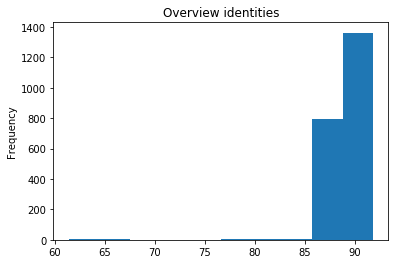

Wall time: 243 ms


In [41]:
%%time
gr.plotCoverRange(cover)

## Salvar Fasta

## Separar as amostras em seus respectivos DF para análise de grau

## Plotting polimorphisms

In [25]:
"""
Hydrophobic Side Chain -> Verde
Witho Polar Uncharged Side Chains -> Roxo
Special Cases -> Amarelo
Electrically charged Side Chains 
    Positive -> Azul Escuro
    Negative -> Azul Claro

""" 
print()

Overview PDB 5GS6:


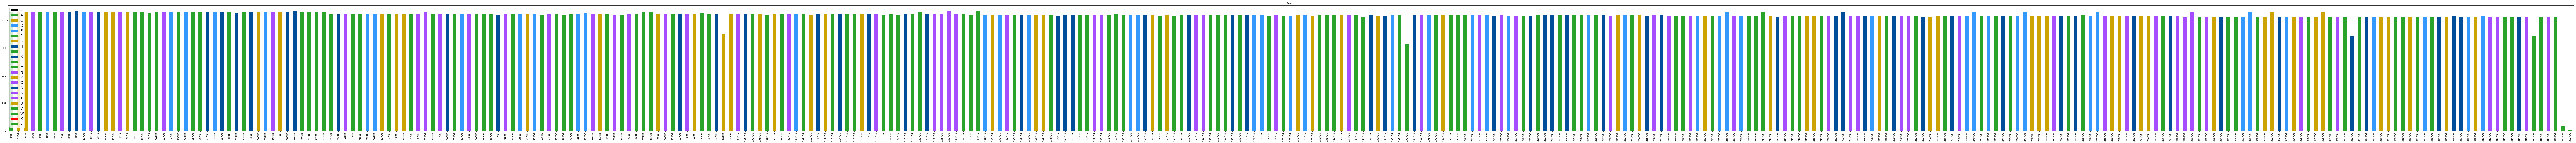

Polimorphism PDB 5GS6:


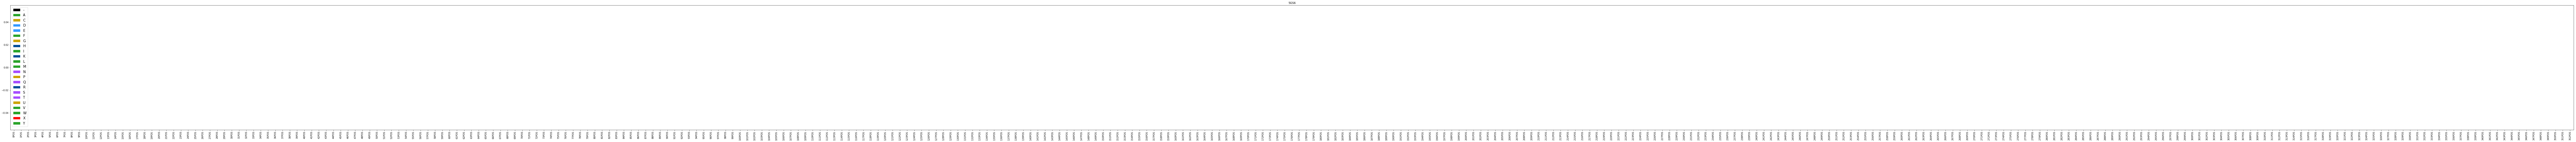

Wall time: 1min 7s


In [26]:
%%time
gr.plotPolimorph(saveList, poliListAmino, "5GS6", True, 4)

Overview PDB 5GS6:


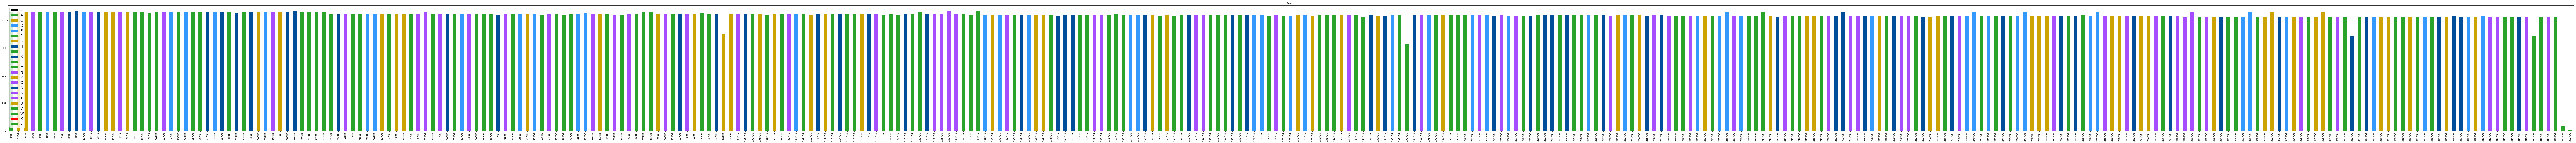

Polimorphism PDB 5GS6:


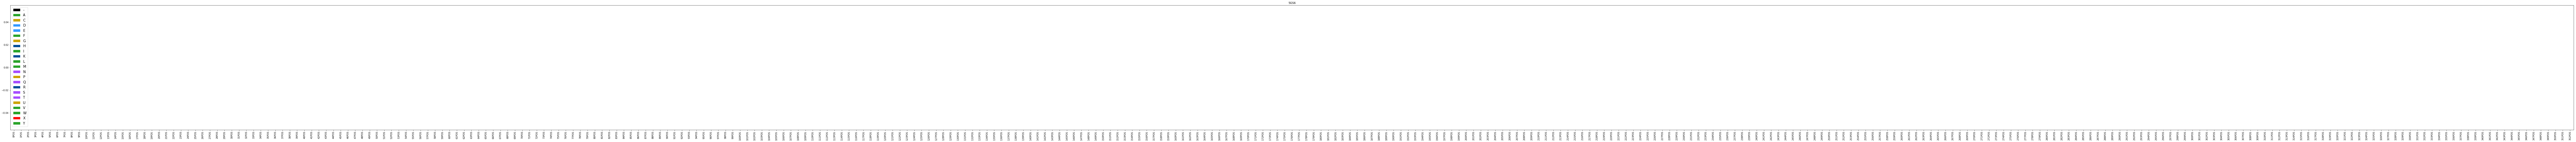

Overview PDB 5IY3:


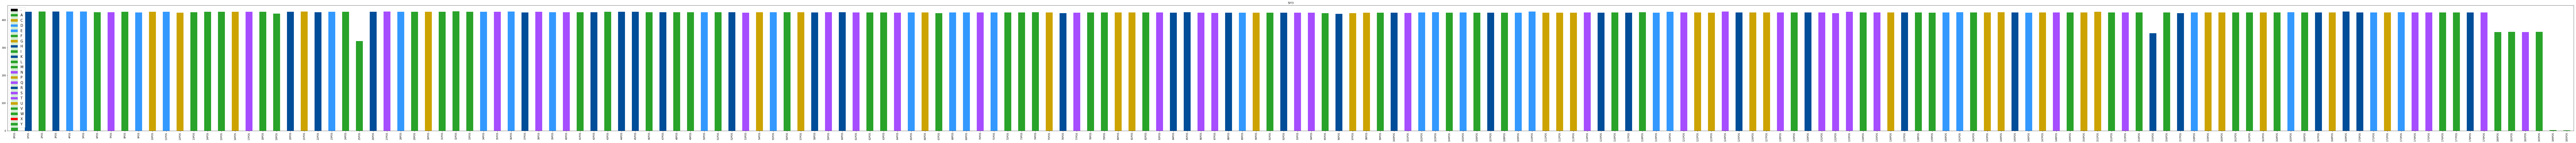

Polimorphism PDB 5IY3:


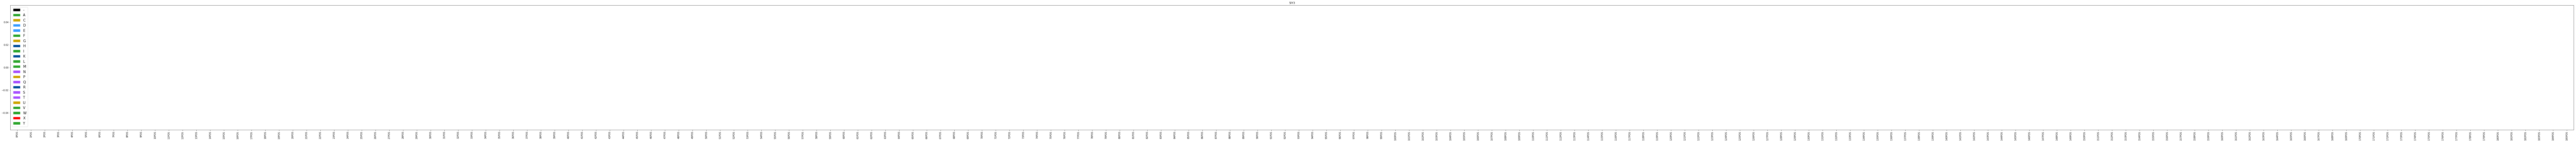

Overview PDB 5K6K:


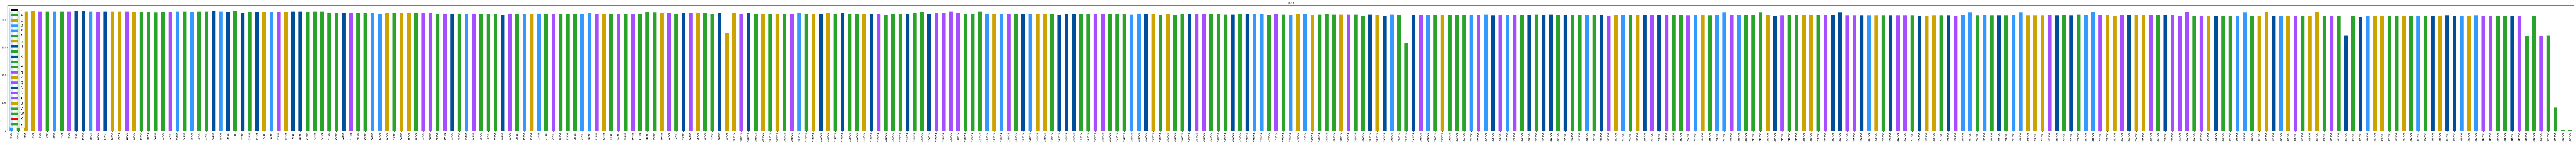

Polimorphism PDB 5K6K:


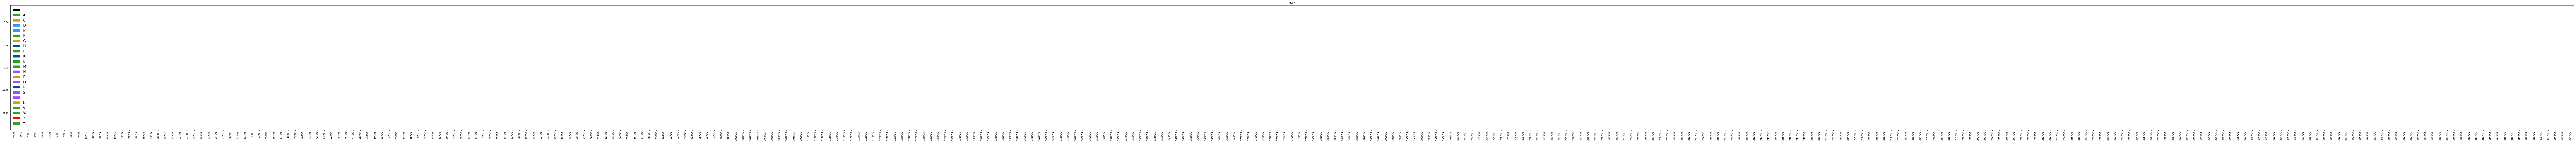

Overview PDB 5JMT:


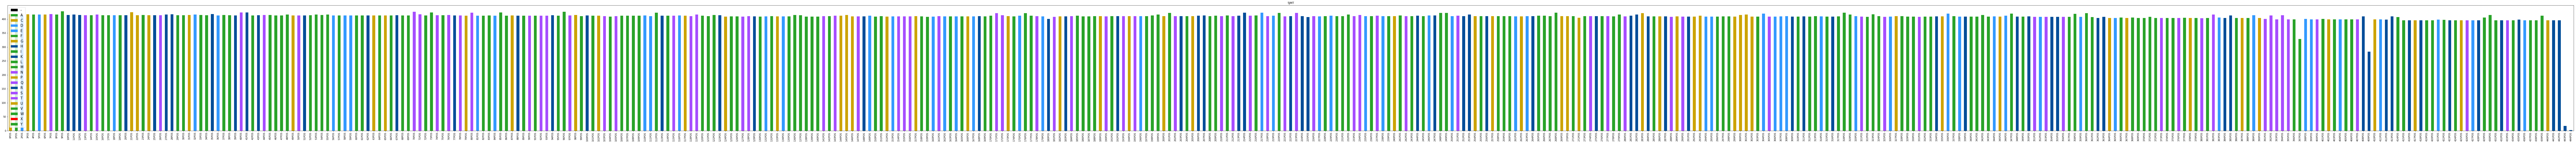

Polimorphism PDB 5JMT:


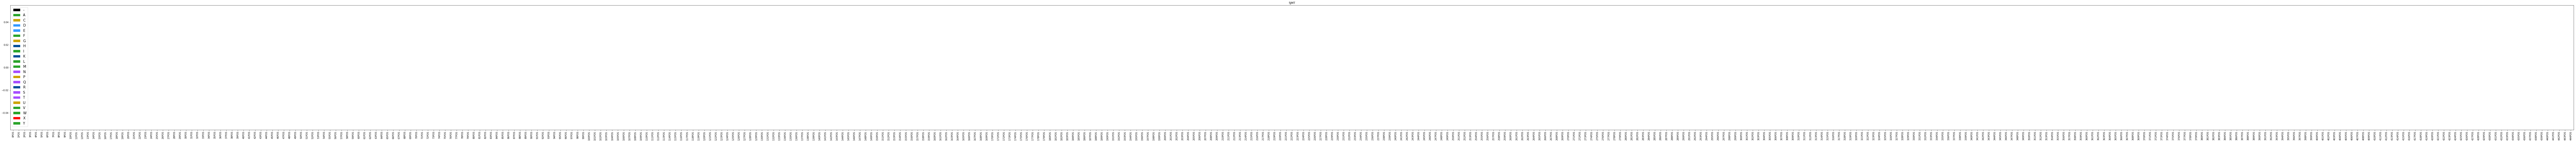

Overview PDB 5TMH:


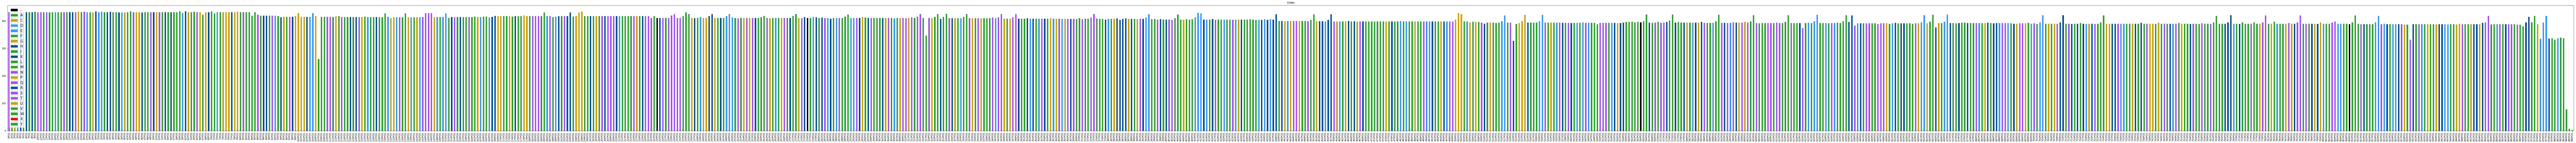

Polimorphism PDB 5TMH:


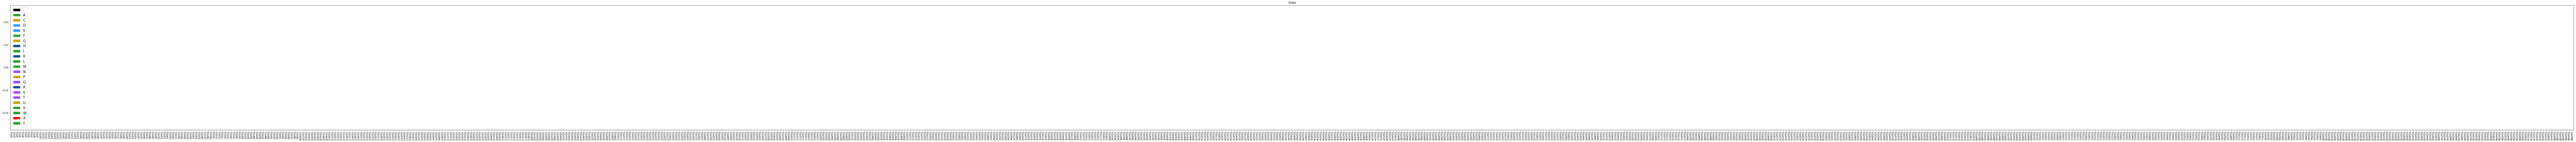

Wall time: 6min 50s


In [27]:
%%time
gr.plotPolimorph(saveList, poliListAmino, "all", True, 4)

## Samples

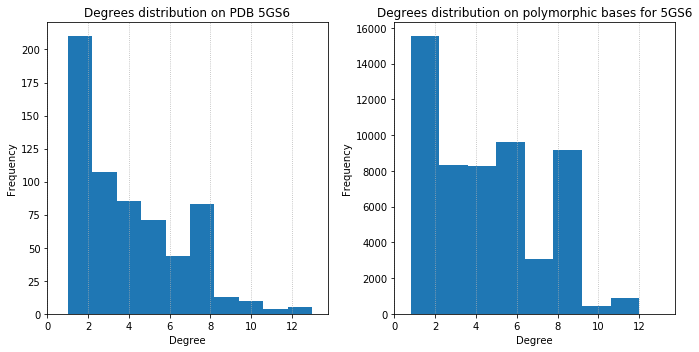

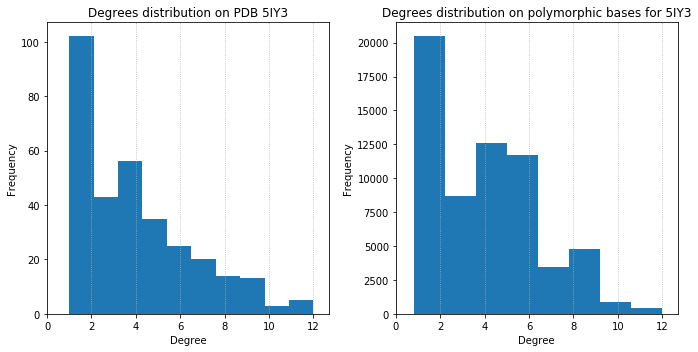

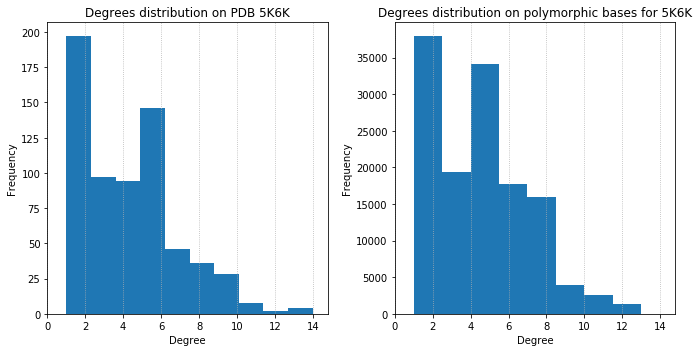

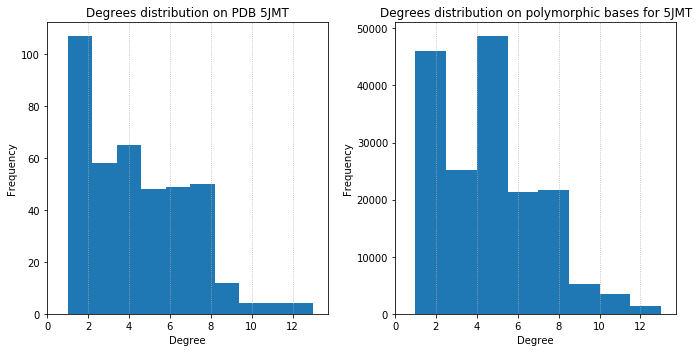

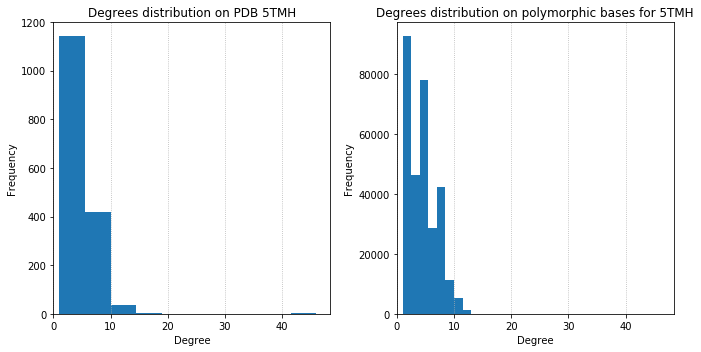

Wall time: 15.4 s


In [28]:
%%time
gr.plotDegrees(saveList, nsFiles, poliListDegree, poliListAmino, "all", 4, False)

In [29]:
nsFiles["5TMH"].Degree.describe()

count    1603.000000
mean        4.281971
std         2.926967
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        46.000000
Name: Degree, dtype: float64

In [30]:
nsFiles["5TMH"][nsFiles["5TMH"].Degree > 15]

,NodeId,Chain,Position,Residue,Dssp,Degree,Bfactor_CA,x,y,z,pdbFileName,Rapdf,Tap,Accessibility
798,A:1001:_:SAH,A,1001,SAH,NaN,45,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1001.A,-999.9,-999.9,-999.9
799,A:1002:_:ZN,A,1002,ZN,NaN,18,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1002.A,-999.9,-999.9,-999.9
800,A:1003:_:ZN,A,1003,ZN,NaN,16,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1003.A,-999.9,-999.9,-999.9
1597,B:1001:_:SAH,B,1001,SAH,NaN,46,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1001.B,-999.9,-999.9,-999.9
1598,B:1002:_:ZN,B,1002,ZN,NaN,18,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1002.B,-999.9,-999.9,-999.9
1599,B:1003:_:ZN,B,1003,ZN,NaN,16,-999.9,-999.9,-999.9,-999.9,5TMH.pdb#1003.B,-999.9,-999.9,-999.9


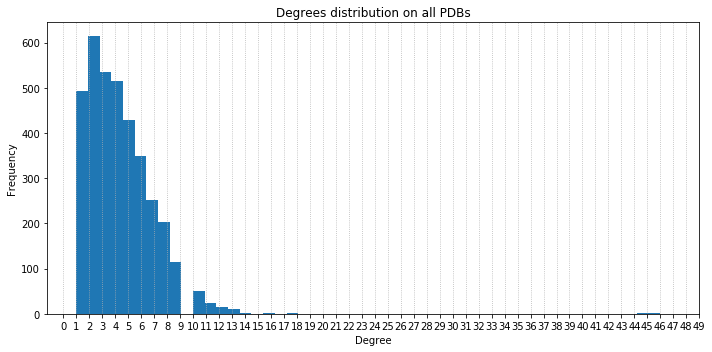

Wall time: 2.92 s


In [31]:
%%time
gr.allPDBs(nsFiles)

# Btweeness

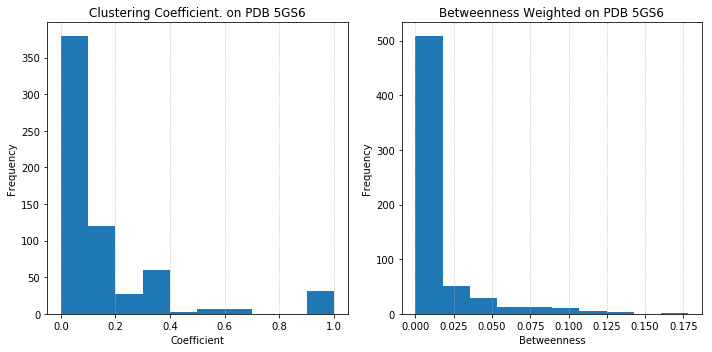

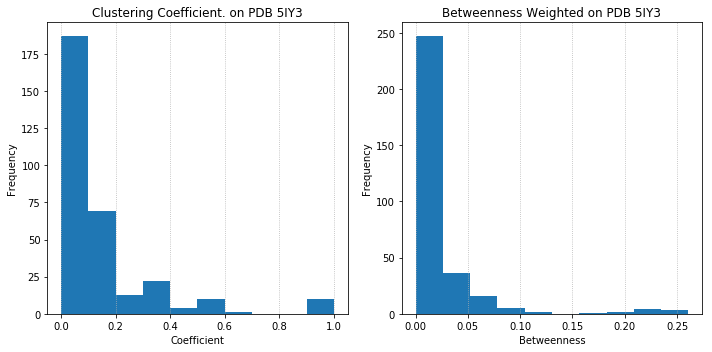

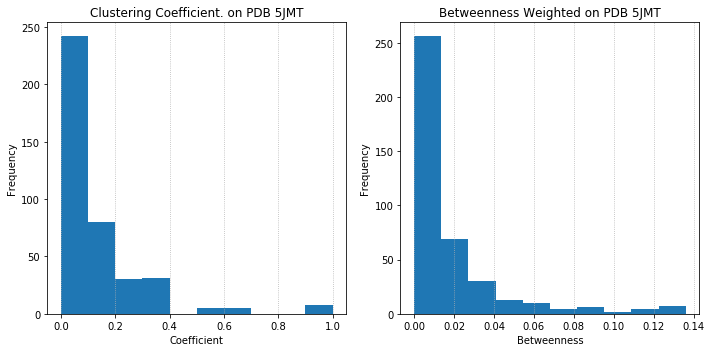

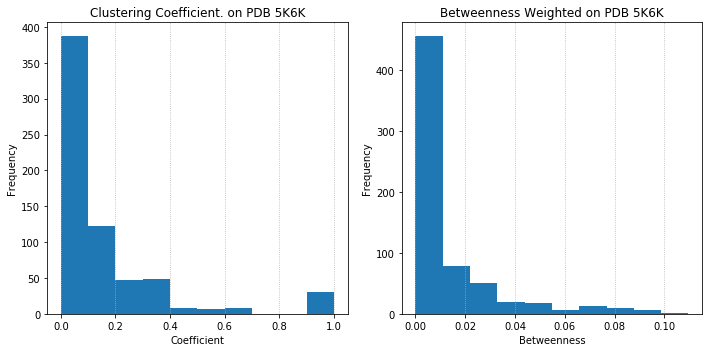

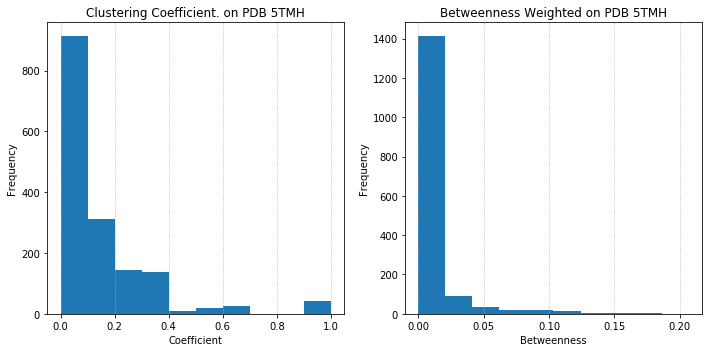

In [32]:
data = pd.read_csv("read/nodesResultCsv.csv", sep="\t")
names = data.filename.unique().tolist()

for ii in names:
    gr.plotBtw(data[data.filename == ii], ii)

In [33]:
def findPoli(df, size=4):
    temp = []
    names = df.columns.tolist()
    for ii in names:
        aux = len(df[ii].value_counts())
        if aux >= size:
            temp.append(ii)
    return df[temp].iloc[:,1:].copy()

In [44]:
findPoli(poliListAmino[0], 4).head()

,11POS,17POS,18POS,19POS,20POS,21POS,24POS,29POS,31POS,32POS,...,286POS,290POS,299POS,304POS,313POS,322POS,323POS,324POS,347POS,349POS
0,T,V,F,V,Y,N,E,R,K,Y,...,E,G,T,R,E,R,A,K,M,T
1,T,X,X,X,X,X,E,R,K,Y,...,E,G,T,R,E,R,A,K,M,T
2,T,V,F,V,Y,N,E,R,K,Y,...,E,G,T,R,E,W,A,K,M,T
3,T,V,F,V,Y,N,E,R,K,Y,...,E,G,T,R,E,R,A,K,M,T
4,T,V,F,V,Y,N,E,R,K,Y,...,E,G,T,R,E,W,A,K,M,T


In [51]:
def makeCountDF(df, proteinID):
    tempAmino = pd.DataFrame()
    tempDegree = pd.DataFrame()
    selectDF = df[df.Protein == proteinID]
    
    cont = 0
    for idx, ii in selectDF.iterrows():
        tam = len(tempAmino)
        seqA = wFunc.splitCell(ii.Seq, True)
        seqB = wFunc.splitCell(ii.Seq, False)

        numCol = len(seqA)
        tempAmino.loc[tam, "ID"] = ii.ID
        tempDegree.loc[tam, "ID"] = ii.ID
        for jj in tqdm(range(numCol)):
            tempAmino.loc[tam, str(jj)+"POS"] = seqA[jj]+"|"+"Hi"
            tempDegree.loc[tam, str(jj)+"POS"] = seqB[jj]

    return tempAmino, tempDegree

In [52]:
%%time
tempAmino, tempDegree = makeCountDF(aminoDegrees, "5K6K")

Wall time: 8 ms


In [53]:
tempAmino

['D',
 'V',
 'G',
 'C',
 'S',
 'V',
 'D',
 'F',
 'S',
 'K',
 'K',
 'E',
 'T',
 'R',
 'C',
 'G',
 'T',
 'G',
 'V',
 'F',
 'V',
 'Y',
 'N',
 'D',
 'V',
 'E',
 'A',
 'W',
 'R',
 'D',
 'R',
 'Y',
 'K',
 'Y',
 'H',
 'P',
 'D',
 'S',
 'P',
 'R',
 'R',
 'L',
 'A',
 'A',
 'A',
 'V',
 'K',
 'Q',
 'A',
 'W',
 'E',
 'D',
 'G',
 'I',
 'C',
 'G',
 'I',
 'S',
 'S',
 'V',
 'S',
 'R',
 'M',
 'E',
 'N',
 'I',
 'M',
 'W',
 'R',
 'S',
 'V',
 'E',
 'G',
 'E',
 'L',
 'N',
 'A',
 'I',
 'L',
 'E',
 'E',
 'N',
 'G',
 'V',
 'Q',
 'L',
 'T',
 'V',
 'V',
 'V',
 'G',
 'S',
 'V',
 'K',
 'N',
 'P',
 'M',
 'W',
 'R',
 'G',
 'P',
 'Q',
 'R',
 'L',
 'P',
 'V',
 'P',
 'V',
 'N',
 'E',
 'L',
 'P',
 'H',
 'G',
 'W',
 'K',
 'A',
 'W',
 'G',
 'K',
 'S',
 'Y',
 'F',
 'V',
 'R',
 'A',
 'A',
 'K',
 'T',
 'N',
 'N',
 'S',
 'F',
 'V',
 'V',
 'D',
 'G',
 'D',
 'T',
 'L',
 'K',
 'E',
 'C',
 'P',
 'L',
 'K',
 'H',
 'R',
 'A',
 'W',
 'N',
 'S',
 'F',
 'L',
 'V',
 'E',
 'D',
 'H',
 'G',
 'F',
 'G',
 'V',
 'F',
 'H',
 'T',
 'S',
 'V'